In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
titanic_data = pd.read_csv('train.csv')

In [6]:
titanic_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [7]:
titanic_data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [12]:
# Now for better understanding we are going to use the heatmap ...
# Filter for numeric columns and compute the correlation matrix
correlation_matrix = titanic_data.corr(numeric_only=True)

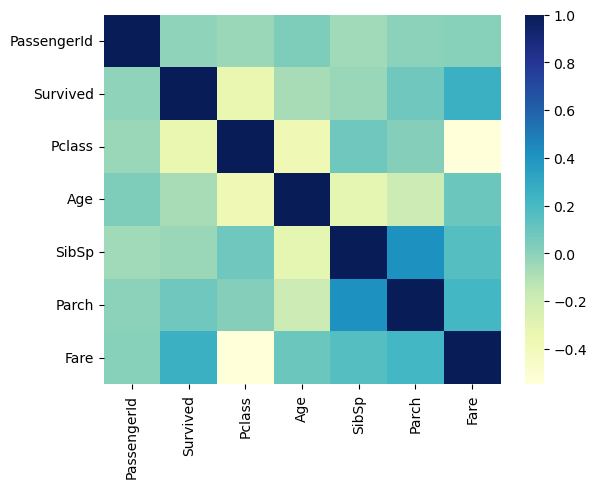

In [17]:
import seaborn as sns
sns.heatmap(correlation_matrix,cmap = 'YlGnBu');

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1 , test_size = 0.2)
for train_indices , test_indices in split.split(titanic_data , titanic_data[["Survived" , "Pclass" , "Sex"]]):
    strat_train_set = titanic_data.loc[train_indices]
    strat_test_set = titanic_data.loc[test_indices]

In [28]:
strat_train_set.head()

PassengerId  Survived  Pclass                              Name     Sex  \
837          838         0       3               Sirota, Mr. Maurice    male   
749          750         0       3           Connaghton, Mr. Michael    male   
399          400         1       2  Trout, Mrs. William H (Jessie L)  female   
341          342         1       1    Fortune, Miss. Alice Elizabeth  female   
309          310         1       1    Francatelli, Miss. Laura Mabel  female   

      Age  SibSp  Parch    Ticket      Fare        Cabin Embarked  
837   NaN      0      0    392092    8.0500          NaN        S  
749  31.0      0      0    335097    7.7500          NaN        Q  
399  28.0      0      0    240929   12.6500          NaN        S  
341  24.0      3      2     19950  263.0000  C23 C25 C27        S  
309  30.0      0      0  PC 17485   56.9292          E36        C

In [30]:
plt.subplot(1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.subplot(1 ,2,2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist();

In [31]:
# Now we need to check if there is any missing value or not...
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 837 to 539
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          577 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        158 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


From the above data we can see that there are some missing value in the Age column...[we don't want to loose any data so we need to modify them]
And the Cabin value is  significantly low but it is not that much important so we can skip this...

In [33]:
from sklearn.base import BaseEstimator , TransformerMixin
from sklearn.impute import SimpleImputer

In [39]:
class AgeImputer (BaseEstimator , TransformerMixin):
    def fit(self , x , y = None):
        return self
    def transform(self , x):
        imputer= SimpleImputer ( strategy = "mean")
        x['Age'] = imputer.fit_transform(x[['Age']])
        return x

In [42]:
from sklearn.preprocessing import OneHotEncoder 

class FeatureEncoder( BaseEstimator , TransformerMixin):
    def fit(self, x , y = None):
        return self
    def transform(self , x):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(x[['Embarked']]).toarray()   # transformint the dataset into an array...

        column_names = ["C","S", "Q","N"]
        for i in range(len(matrix.T)):
            x[column_names[i]] = matrix.T[i]

        matrix = encoder.fit_transform(x[['Sex']]).toarray()
        
        column_names = ["Female", "Male"]
        for i in range(len(matrix.T)):
            x[column_names[i]] = matrix.T[i]
        return x

In [47]:
# Now we need to drop some features

class FeatureDropper( BaseEstimator , TransformerMixin):
    def fit(self , x , y = None):
        return self
    def transform(self,x):
        return x.drop(["Embarked","Name", "Ticket", "Cabin","Sex","N"] , axis = 1 , errors = "ignore") 
# not the cleanest way but I've to go for it 

In [48]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("ageimputer", AgeImputer()),
                     ("featureencoder",FeatureEncoder()),
                     ("featuredropper",FeatureDropper())])
                    

In [49]:
strat_train_set = pipeline.fit_transform(strat_train_set)

In [51]:
strat_train_set.head()

PassengerId  Survived  Pclass        Age  SibSp  Parch      Fare
837          838         0       3  29.491057      0      0    8.0500
749          750         0       3  31.000000      0      0    7.7500
399          400         1       2  28.000000      0      0   12.6500
341          342         1       1  24.000000      3      2  263.0000
309          310         1       1  30.000000      0      0   56.9292

In [52]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 837 to 539
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 44.5 KB


Now as we can see that the unnecesarry columns are deleted and the missing values are also filled...

In [56]:
from sklearn.preprocessing import StandardScaler

x = strat_train_set.drop(['Survived'], axis = 1)
y = strat_train_set['Survived']

scaler = StandardScaler()
x_data  = scaler.fit_transform(x)
y_data = y.to_numpy()

In [57]:
x_data

array([[ 1.51667968e+00,  8.27893418e-01,  2.76328079e-16,
        -4.81604004e-01, -4.85975750e-01, -4.91997442e-01],
       [ 1.17029688e+00,  8.27893418e-01,  1.17364726e-01,
        -4.81604004e-01, -4.85975750e-01, -4.98000500e-01],
       [-2.07361984e-01, -3.70196244e-01, -1.15973593e-01,
        -4.81604004e-01, -4.85975750e-01, -3.99950554e-01],
       ...,
       [ 4.73595112e-01, -1.56828591e+00,  5.06261925e-01,
        -4.81604004e-01, -4.85975750e-01, -1.25060528e-01],
       [-8.09595716e-01,  8.27893418e-01, -3.49311912e-01,
        -4.81604004e-01, -4.85975750e-01, -4.97500245e-01],
       [ 3.43701562e-01, -1.56828591e+00, -5.82650231e-01,
        -4.81604004e-01,  2.02137739e+00,  3.37425058e-01]])

We are going to use the 'random forest clasifier' for further operation...

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()
param_gird = [
    {"n_estimators": [10,100,200,500],"max_depth":[None,5 , 10], "min_samples_split":[2,3,4]}
]
grid_search = GridSearchCV(clf, param_gird , cv = 3, scoring="accuracy",return_train_score = True)
grid_search.fit(x_data , y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [60]:
final_clf = grid_search.best_estimator_

In [62]:
final_clf

RandomForestClassifier(max_depth=5, min_samples_split=4, n_estimators=200)

In [63]:
strat_test_set = pipeline.fit_transform(strat_test_set)

In [65]:
strat_test_set.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch    Fare
748          749         0       1  19.0      1      0  53.100
736          737         0       3  48.0      1      3  34.375
242          243         0       2  29.0      0      0  10.500
728          729         0       2  25.0      1      0  26.000
252          253         0       1  62.0      0      0  26.550

In [66]:
x_test = strat_test_set.drop(['Survived'],axis = 1)
y_test = strat_test_set['Survived']

scaler = StandardScaler()
x_data_test = scaler.fit_transform(x_test)
y_data_test = y_test.to_numpy()

In [68]:
final_clf.score(x_data_test , y_data_test)

0.6983240223463687

In [69]:
final_data = pipeline.fit_transform(titanic_data)

In [70]:
final_data

PassengerId  Survived  Pclass        Age  SibSp  Parch     Fare
0              1         0       3  22.000000      1      0   7.2500
1              2         1       1  38.000000      1      0  71.2833
2              3         1       3  26.000000      0      0   7.9250
3              4         1       1  35.000000      1      0  53.1000
4              5         0       3  35.000000      0      0   8.0500
..           ...       ...     ...        ...    ...    ...      ...
886          887         0       2  27.000000      0      0  13.0000
887          888         1       1  19.000000      0      0  30.0000
888          889         0       3  29.699118      1      2  23.4500
889          890         1       1  26.000000      0      0  30.0000
890          891         0       3  32.000000      0      0   7.7500

[891 rows x 7 columns]

In [71]:
x_final = final_data.drop(['Survived'],axis = 1)
y_final = final_data['Survived']

scaler = StandardScaler()
x_data_final = scaler.fit_transform(x_final)
y_data_final = y_final.to_numpy()


In [72]:
prod_clf = RandomForestClassifier()
param_gird = [
    {"n_estimators": [10,100,200,500],"max_depth":[None,5 , 10], "min_samples_split":[2,3,4]}
]
grid_search = GridSearchCV(prod_clf, param_gird , cv = 3, scoring="accuracy",return_train_score = True)
grid_search.fit(x_data_final , y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [73]:
prod_final_clf = grid_search.best_estimator_

In [74]:
prod_final_clf

RandomForestClassifier(max_depth=5, min_samples_split=3)

In [76]:
titanic_test_data = pd.read_csv("test.csv")

In [77]:
titanic_test_data

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0              330911    7.8292   NaN        Q  
1    female  47.0      1      0              363272    7.0000   NaN        S  
2      male  62.0      0      0              240276    9.6875   NaN        Q  
3      male  27.0      0      0              315154    8.6625   NaN        S  
4    female  22.0      1      1             3101298   12.2875   NaN        S  
..      ...   ...    ...    ...                 ...       ...   ...      ...  
413    male   NaN      0      0           A.5. 3236    8.0500   NaN        S  
414  female  39.0      0      0            PC 17758  108.9000  C105        C  
415    male  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416    male   NaN      0      0              359309    8.0500   NaN        S  
417    male   NaN      1      1                2668   22.3583   NaN        C  

[418 rows x 11 columns]

In [78]:
final_test_data = pipeline.fit_transform(titanic_test_data)

In [79]:
final_test_data

PassengerId  Pclass       Age  SibSp  Parch      Fare
0            892       3  34.50000      0      0    7.8292
1            893       3  47.00000      1      0    7.0000
2            894       2  62.00000      0      0    9.6875
3            895       3  27.00000      0      0    8.6625
4            896       3  22.00000      1      1   12.2875
..           ...     ...       ...    ...    ...       ...
413         1305       3  30.27259      0      0    8.0500
414         1306       1  39.00000      0      0  108.9000
415         1307       3  38.50000      0      0    7.2500
416         1308       3  30.27259      0      0    8.0500
417         1309       3  30.27259      1      1   22.3583

[418 rows x 6 columns]

In [80]:
final_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 19.7 KB


In [85]:
x_final_test = final_test_data
x_final_test = x_final_test.fillna(method = "ffill")

scaler = StandardScaler()
x_data_final_test = scaler.fit_transform(x_final_test)

C:\Users\gopee\AppData\Local\Temp\ipykernel_5248\3082901692.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  x_final_test = x_final_test.fillna(method = "ffill")


In [86]:
predictions = prod_final_clf.predict(x_data_final_test)

In [87]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,

Now we are going to save our predictions as a csv file

In [88]:
final_df = pd.DataFrame(titanic_test_data['PassengerId'])
final_df['Survived'] = predictions
final_df.to_csv('Prediction.csv', index = False)

In [89]:
final_df

PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]